In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap

from collections import deque
import heapq

import tqdm

In [2]:
def generate_map(x_size, y_size, th, start_x, start_y, end_x, end_y):
  map = np.random.rand(x_size, y_size)
  map[map < th] = 0
  map[map >= th] = 1
  map[start_x, start_y] = -1
  map[end_x, end_y] = -1

  return map

def generate_path(map, function, start_x, start_y, end_x, end_y):
  return [(start_x, start_y)] + function(map, start_x, start_y, end_x, end_y)

def generate_path_2d(map, function, start_x, start_y, end_x, end_y):
  path = generate_path(map, function, start_x, start_y, end_x, end_y)
  
  path_2d = np.zeros_like(map)
  for x, y in path:
    path_2d[x, y] = 1

  return path_2d

def generate_map_path(map, function, start_x, start_y, end_x, end_y):
  map_copy = map.copy()
  path = generate_path(map, function, start_x, start_y, end_x, end_y)

  for x, y in path:
    map_copy[x, y] = -1

  return map_copy

def plot_map(map):
  cmap = ListedColormap(['green', '#440154', '#FFED23'])
  plt.matshow(map, cmap = cmap)
  plt.show()

In [3]:
def get_neighbors(map, x, y):
    neighbors = []
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Up, Down, Left, Right
    for dx, dy in directions:
        nx, ny = x + dx, y + dy
        if 0 <= nx < map.shape[0] and 0 <= ny < map.shape[1] and map[nx][ny] != 1:
            neighbors.append((nx, ny))
    return neighbors

In [4]:
def a_star(map, start_x, start_y, end_x, end_y):
    start = (start_x, start_y)
    end = (end_x, end_y)

    def heuristic(a, b):
        return abs(a[0] - b[0]) + abs(a[1] - b[1])  # Manhattan distance

    open_list = []
    heapq.heappush(open_list, (0, start))
    g_costs = {start: 0}
    parent = {start: None}

    while open_list:
        _, current = heapq.heappop(open_list)
        if current == end:
            break
        for neighbor in get_neighbors(map, *current):
            tentative_g_cost = g_costs[current] + 1
            if neighbor not in g_costs or tentative_g_cost < g_costs[neighbor]:
                g_costs[neighbor] = tentative_g_cost
                f_cost = tentative_g_cost + heuristic(neighbor, end)
                heapq.heappush(open_list, (f_cost, neighbor))
                parent[neighbor] = current

    # Reconstruct the path
    path = []
    node = end
    while node != start:
        path.append(node)
        node = parent[node]
    path.reverse()
    return path

# Finally, generate data

In [5]:
data_x = []
data_y = []

for i in tqdm.tqdm_notebook(range(100000), desc = "a_star"):
    start_x = 0
    start_y = 0
    end_x = 0
    end_y = 0

    while((start_x - end_y)**2 + (start_y - end_y)**2 <= 15*15):
        start_x = int(np.random.rand() * 15)
        start_y = int(np.random.rand() * 15)
        end_x = int(np.random.rand() * 15)
        end_y = int(np.random.rand() * 15)

    try:
        map = generate_map(16, 16, 0.9, start_x, start_y, end_x, end_y)
        path = generate_path_2d(map, a_star, start_x, start_y, end_x, end_y)

        data_x.append(map)
        data_y.append(path)
    except:
        i -= 1

data_x = np.array(data_x)
data_y = np.array(data_y)

/tmp/ipykernel_28636/3578737814.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm.tqdm_notebook(range(100000), desc = "a_star"):


a_star:   0%|          | 0/100000 [00:00<?, ?it/s]

In [6]:
data_x.shape

(99753, 16, 16)

In [7]:
data_y.shape

(99753, 16, 16)

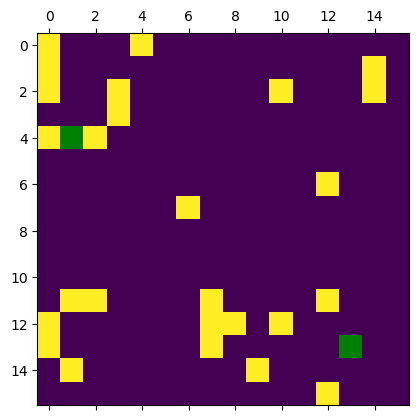

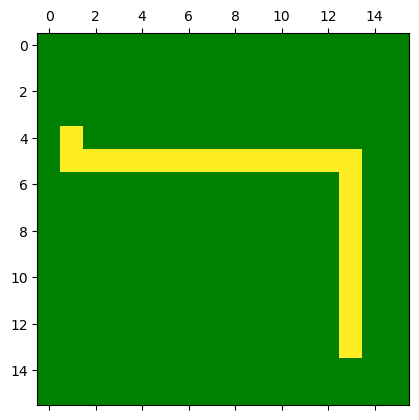

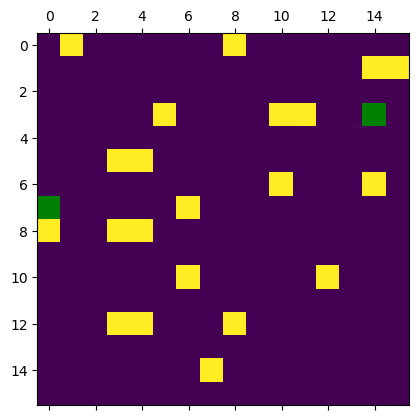

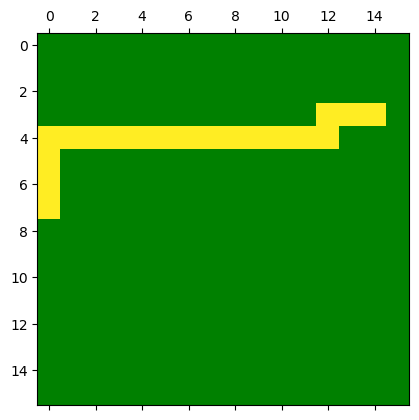

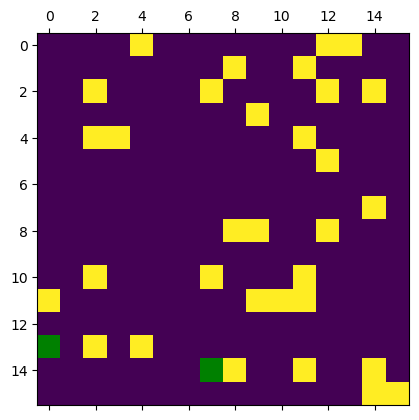

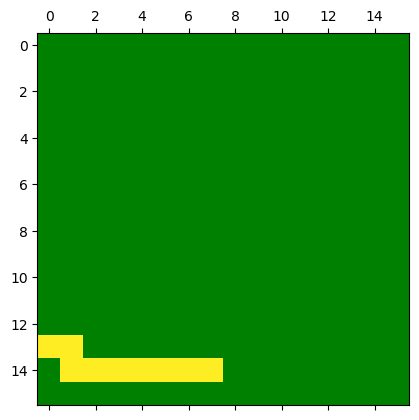

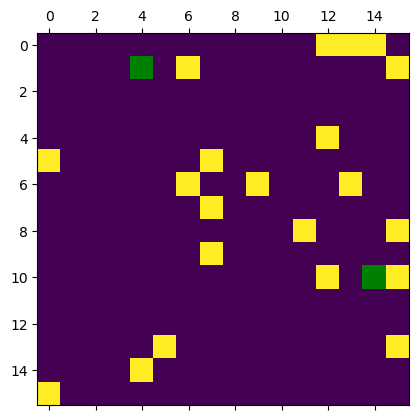

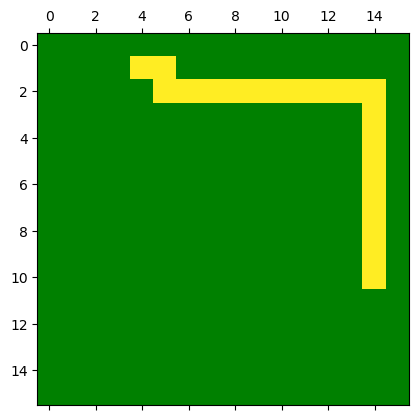

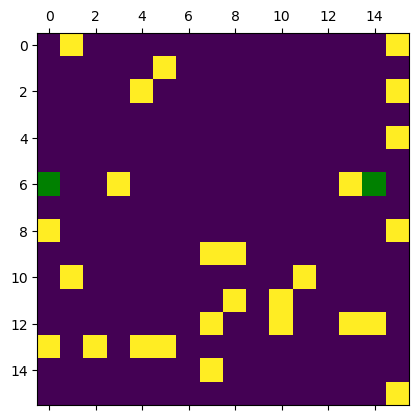

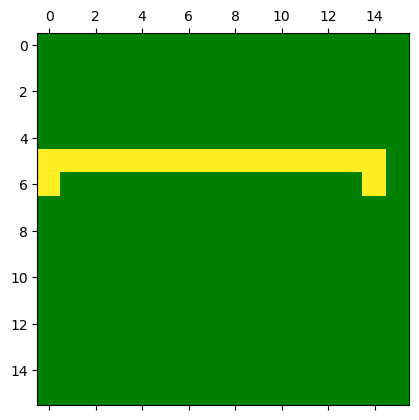

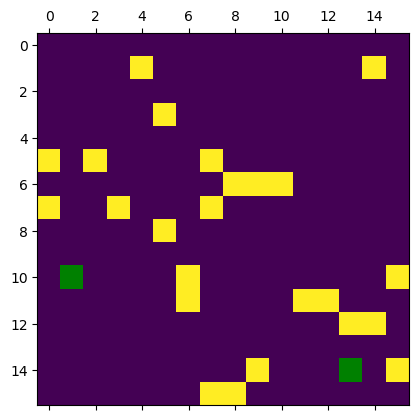

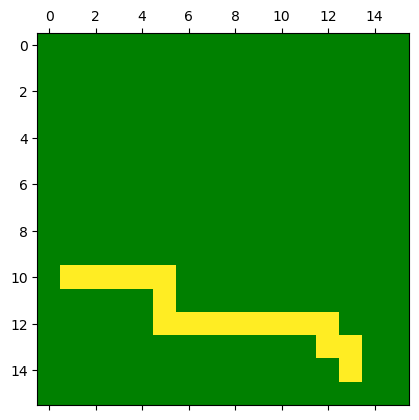

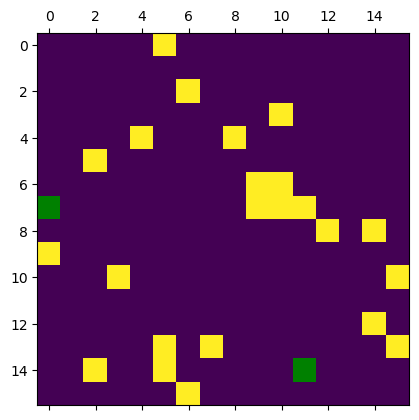

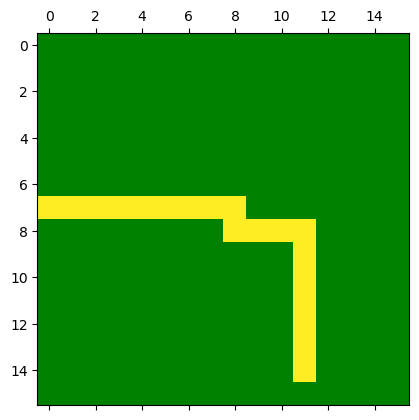

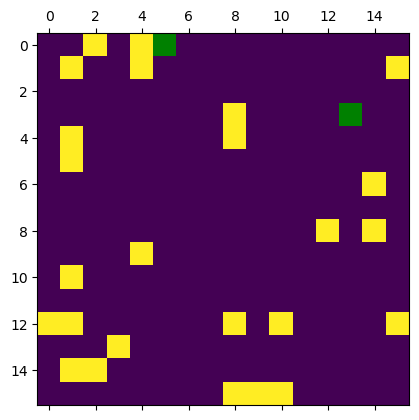

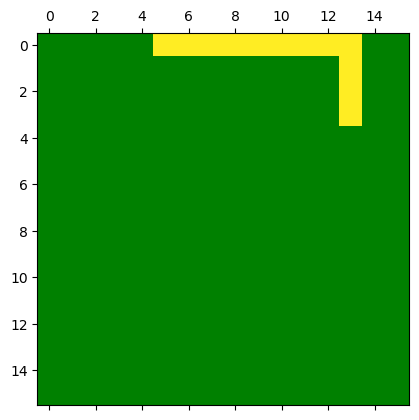

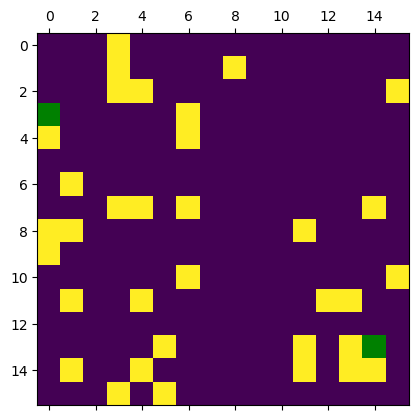

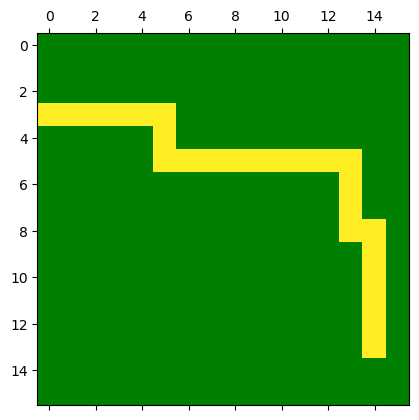

In [8]:
for i in range(1, 10):
    plot_map(data_x[i])
    plot_map(data_y[i])

In [9]:
np.save('data/data_x', data_x, allow_pickle = True)
np.save('data/data_y', data_y, allow_pickle = True)